In [1]:
import pandas as pd

from geopy.geocoders import Nominatim

# Загрузка данных

In [2]:
#%%capture
#!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [2]:
data = pd.read_excel('data/data_ford_price.xlsx') 

# Обработка географических данных

In [17]:
#geolocator = Nominatim(user_agent="geoapiExercises")
geolocator = Nominatim(user_agent="asdfg")

In [18]:
Latitude = str(data['lat'][0])
Longitude =  str(data['long'][0])
location = geolocator.reverse(Latitude+","+Longitude)
print(location)

Fort Henry Drive, Kingsport, Sullivan County, East Tennessee, Tennessee, 37663, United States


In [19]:
address = location.raw['address']
address

{'road': 'Fort Henry Drive',
 'city': 'Kingsport',
 'county': 'Sullivan County',
 'region': 'East Tennessee',
 'state': 'Tennessee',
 'ISO3166-2-lvl4': 'US-TN',
 'postcode': '37663',
 'country': 'United States',
 'country_code': 'us'}

Задание 7.2
<br>Найдите почтовый код шестого объекта выборки

In [20]:
# найдем адрес шестого объекта выборки
Latitude = str(data['lat'][5])
Longitude =  str(data['long'][5])
location = geolocator.reverse(Latitude+","+Longitude)
print(location)

E and J Motors, 622, Southeast 82nd Avenue, Montavilla, Portland, Multnomah County, Oregon, 97216, United States


In [21]:
address = location.raw['address']
address

{'shop': 'E and J Motors',
 'house_number': '622',
 'road': 'Southeast 82nd Avenue',
 'suburb': 'Montavilla',
 'city': 'Portland',
 'county': 'Multnomah County',
 'state': 'Oregon',
 'ISO3166-2-lvl4': 'US-OR',
 'postcode': '97216',
 'country': 'United States',
 'country_code': 'us'}

In [23]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [22]:
address.get('postcode')

'97216'

# Отрисовка карты

In [12]:
#!pip install geopandas
#!pip install shapely

In [24]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

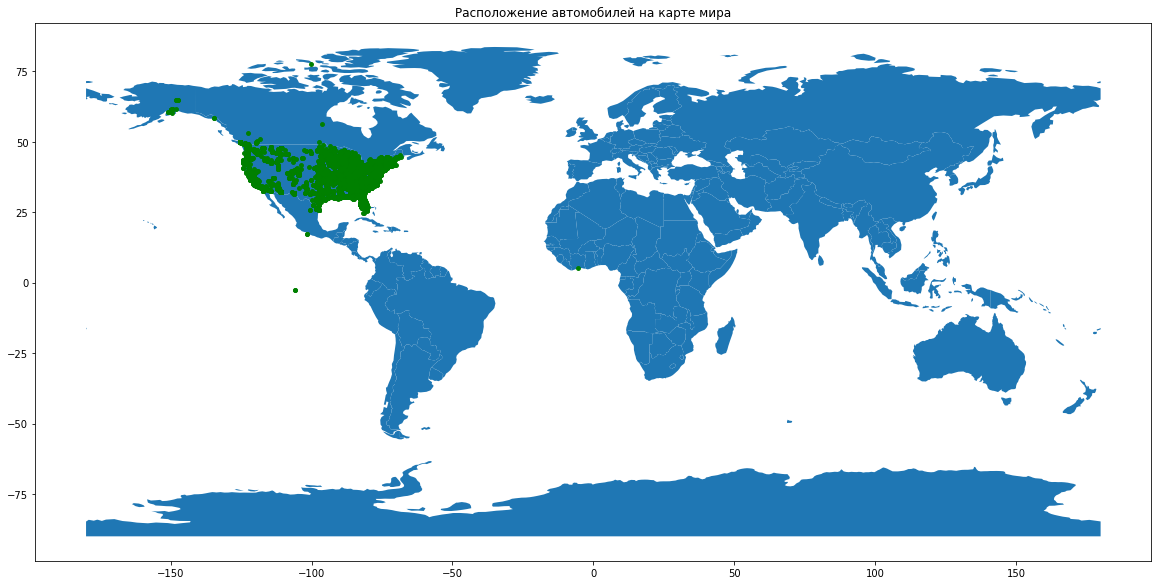

In [28]:
geometry = [Point(xy) for xy in zip(data['long'], data['lat'])]
gdf = GeoDataFrame(data, geometry=geometry)  
 
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

gdf.plot(ax=world.plot(figsize=(20, 15)), marker='o', color='green', markersize=15)
 
plt.title('Расположение автомобилей на карте мира')
plt.show()

In [29]:
import plotly.express as px
 
fig = px.scatter_geo(data,lat='lat',lon='long', hover_name="price")
fig.update_layout(title = 'Интерактивная карта цены автомобиля в зависимости от локации', title_x=1)
fig.show()